In [82]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("/content/sample_SR_mock_data.xlsx")

# Basic structure
print(df.shape)
df.head(3)


(50, 49)


,ATTRIBUTEDTO,CASETYPE,CLOSEDATE,IMPACT,RESOLVEDOWNER,RESOLVEDTIME,RFODURATIONMINS,RFOSENTTIME,SEVERITY,PLATFORM,...,AUTOMATION_RCA_CONCLUSION_TEXT,AUTOMATION_RUN,ROSTER_ALLOCATION,ROSTER_ALLOCATION_TIME,FIRST_ACKNOWLEDGEMENT_TIME,SR_STATE,DURATION,TIME_DIFF,AUTOMATION_START_TIME,AUTOMATION_END_TIME
0,No Fault Found,Complaint,27-06-2025 19:00,Service Impacting,RF_EGB,27-06-2025 20:00,998,28-06-2025 09:32,Severity 2,Fiber GPON,...,Automation Observation\n\nWAN IP ping status :...,Y,Auto,27-06-2025 16:53,27-06-2025 16:56,In Progress,1-5 minute,1.95,27-06-2025 16:55,27-06-2025 16:57
1,No Fault Found,Complaint,30-06-2025 21:00,Service Impacting,RF_EGB,28-06-2025 12:00,998,28-06-2025 09:32,Severity 2,Ethernet,...,Automation Observation\n\nWAN IP ping status :...,Y,Auto,27-06-2025 16:53,27-06-2025 16:56,In Progress,1-5 minute,1.95,27-06-2025 16:55,27-06-2025 16:57
2,No Fault Found,Complaint,28-06-2025 21:00,Service Impacting,RF_EGB,29-06-2025 03:00,998,28-06-2025 09:32,Severity 2,Ethernet,...,Automation Observation\n\nWAN IP ping status :...,Y,Auto,27-06-2025 16:53,27-06-2025 16:56,In Progress,1-5 minute,1.95,27-06-2025 16:55,27-06-2025 16:57


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ATTRIBUTEDTO                    50 non-null     object 
 1   CASETYPE                        50 non-null     object 
 2   CLOSEDATE                       50 non-null     object 
 3   IMPACT                          50 non-null     object 
 4   RESOLVEDOWNER                   50 non-null     object 
 5   RESOLVEDTIME                    50 non-null     object 
 6   RFODURATIONMINS                 50 non-null     int64  
 7   RFOSENTTIME                     50 non-null     object 
 8   SEVERITY                        50 non-null     object 
 9   PLATFORM                        50 non-null     object 
 10  PRODUCT                         50 non-null     object 
 11  SRNUMBER                        50 non-null     int64  
 12  SINUMBER                        50 non

In [84]:

df.isna().sum().sort_values(ascending=False).head(10)


,0
SRSUMMARY,50
CASETYPE,0
CLOSEDATE,0
IMPACT,0
RESOLVEDOWNER,0
RESOLVEDTIME,0
RFODURATIONMINS,0
RFOSENTTIME,0
SEVERITY,0
PLATFORM,0


In [85]:
df.describe()


,RFODURATIONMINS,SRNUMBER,SINUMBER,SRSUMMARY,TIME_DIFF
count,50.0,5.000000e+01,5.000000e+01,0.0,5.000000e+01
mean,998.0,3.809427e+07,1.050662e+07,NaN,1.950000e+00
std,0.0,1.457738e+01,1.457738e+01,NaN,1.794391e-15
min,998.0,3.809425e+07,1.050660e+07,NaN,1.950000e+00
25%,998.0,3.809426e+07,1.050661e+07,NaN,1.950000e+00
50%,998.0,3.809427e+07,1.050662e+07,NaN,1.950000e+00
75%,998.0,3.809428e+07,1.050663e+07,NaN,1.950000e+00
max,998.0,3.809430e+07,1.050665e+07,NaN,1.950000e+00


In [ ]:
date_cols = ['SRCREATIONTIME', 'CLOSEDATE', 'RESOLVEDTIME']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['Duration_hours'] = (df['CLOSEDATE'] - df['SRCREATIONTIME']).dt.total_seconds()/3600
df.Duration_hours

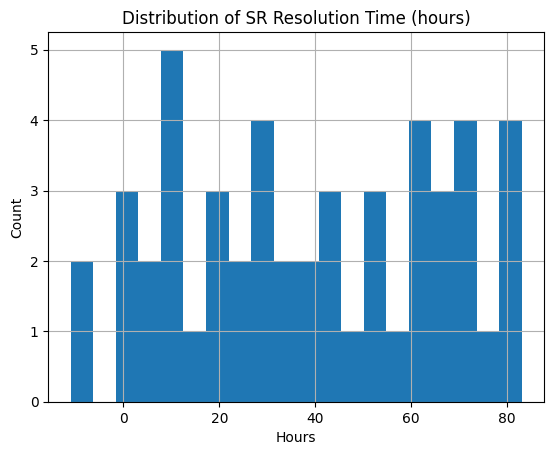

In [87]:
import matplotlib.pyplot as plt

df['Duration_hours'].hist(bins=20)
plt.title('Distribution of SR Resolution Time (hours)')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()


In [88]:

for col in ['ATTRIBUTEDTO', 'IMPACT', 'SEVERITY', 'CASETYPE']:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*40)


ATTRIBUTEDTO
No Fault Found    100.0
Name: proportion, dtype: float64
----------------------------------------
IMPACT
Service Impacting    100.0
Name: proportion, dtype: float64
----------------------------------------
SEVERITY
Severity 2    100.0
Name: proportion, dtype: float64
----------------------------------------
CASETYPE
Complaint    100.0
Name: proportion, dtype: float64
----------------------------------------


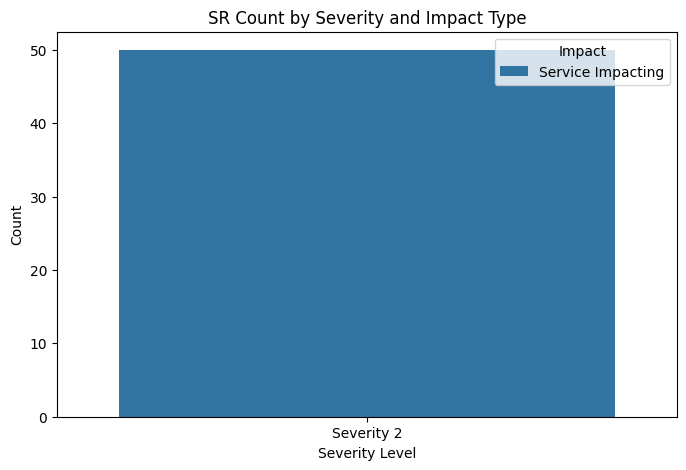

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month-year
df['month'] = df['SRCREATIONTIME'].dt.to_period('M')

# Count SRs per month
sr_trend = df.groupby('month').size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='SEVERITY', hue='IMPACT')
plt.title('SR Count by Severity and Impact Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.legend(title='Impact')
plt.show()



# Observation:
Tried to find the imbalance between the dataset of some columns.
The columns taken return single categories which doesn't give us any real value

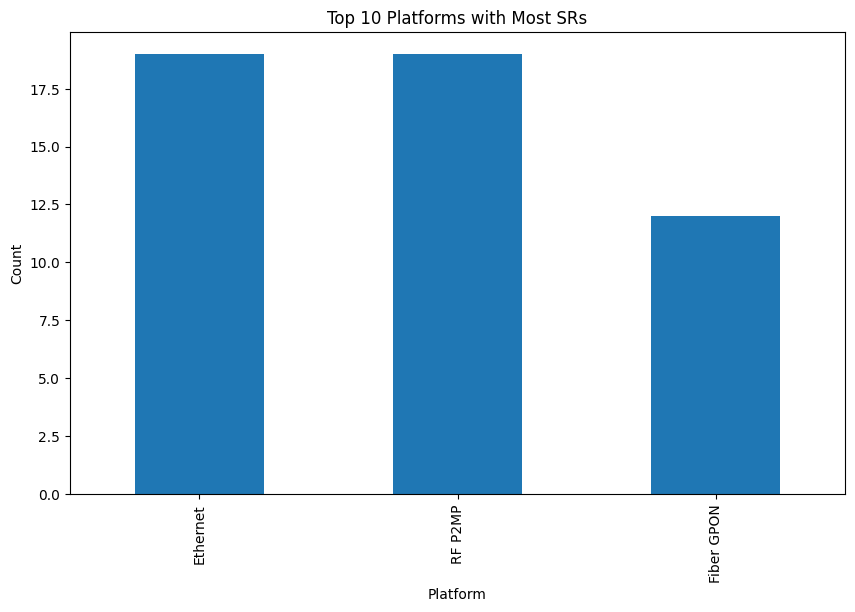

In [90]:
plt.figure(figsize=(10,6))
df['PLATFORM'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Platforms with Most SRs')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


# Observation:
Platforms like Ethernet and RFP2Mp have higner number of service tickets

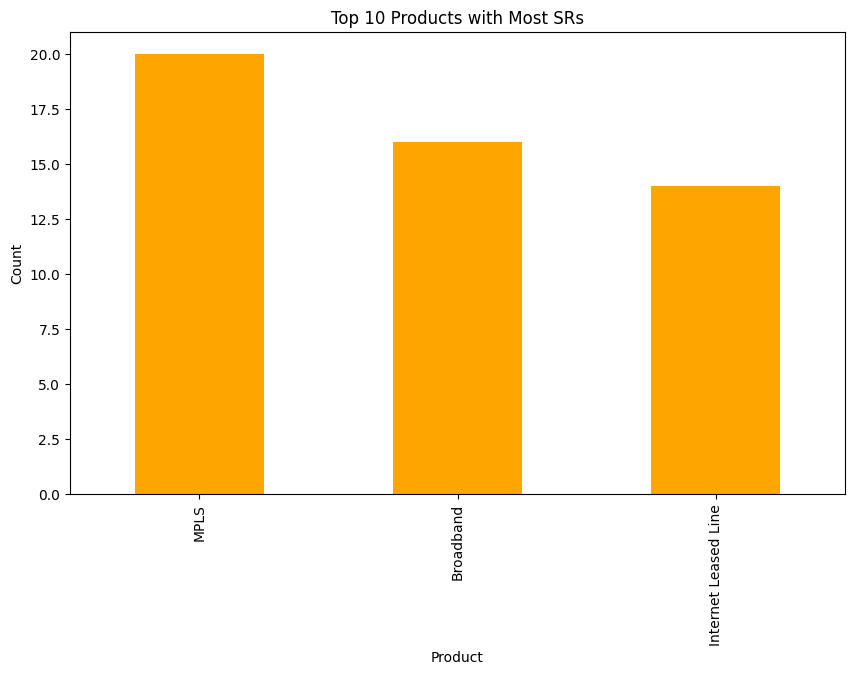

In [91]:

plt.figure(figsize=(10,6))
df['PRODUCT'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Products with Most SRs')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()


# Observation:
SR's by product wise have 'MPLS and Braodband' contians more SRs

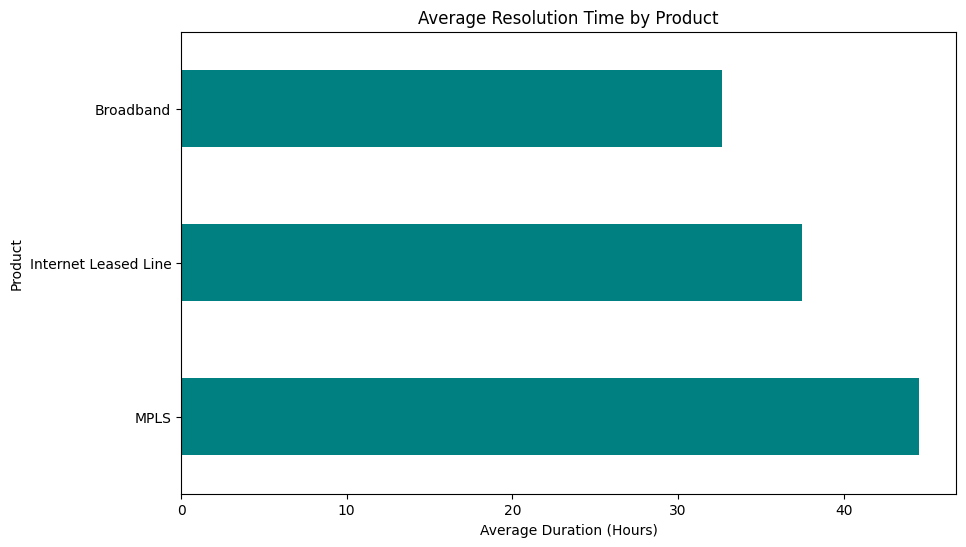

In [92]:
avg_duration = df.groupby('PRODUCT')['Duration_hours'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_duration.plot(kind='barh', color='teal')
plt.title('Average Resolution Time by Product')
plt.xlabel('Average Duration (Hours)')
plt.ylabel('Product')
plt.show()


# Observation:
MPLS takes more then 40+ hours as resolution time then compared to LeasedLines and broadband

/tmp/ipython-input-4271775562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


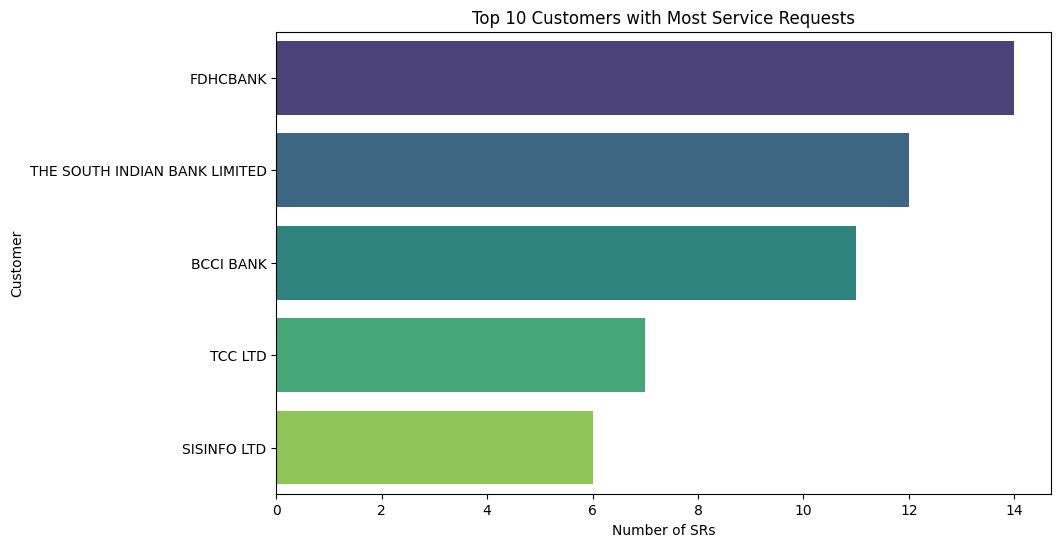

In [93]:
top_customers = df['CUSTOMER_NAME'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers with Most Service Requests')
plt.xlabel('Number of SRs')
plt.ylabel('Customer')
plt.show()


# Observation:
FDHC-->SIB-->Bcci have more than 10+ Service requests reported which needed attention

# Remove unuseful columns by terms of only one unique datapoint

In [99]:
# Find columns with only one unique value
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

removable_columns= ['ATTRIBUTEDTO', 'CASETYPE', 'IMPACT', 'RESOLVEDOWNER', 'RFODURATIONMINS', 'RFOSENTTIME', 'SEVERITY', 'Stitched', 'SRFFC', 'SRLEVELUPTIME', 'SRRC', 'SUBTYPE', 'TYPE', 'VENDORTTDETAILS', 'TOP_CUSTOMER', 'PRODUCT_CG', 'SUB_PRODUCT', 'MEDIA', 'SERVICE_SEGMENT', 'SOURCE_OM', 'CUSTOMER_TYPE', 'ATTRIBUTION', 'SIEBEL_PRODUCT', 'HANDOVER_PORT_STATUS',  'AUTOMATION_RCA_CONCLUSION', 'AUTOMATION_RUN', 'ROSTER_ALLOCATION', 'ROSTER_ALLOCATION_TIME', 'FIRST_ACKNOWLEDGEMENT_TIME', 'SR_STATE', 'DURATION', 'TIME_DIFF', 'AUTOMATION_START_TIME', 'AUTOMATION_END_TIME', 'month']

# Drop them
df = df.drop(columns=removable_columns)
df.columns

Constant columns: ['ATTRIBUTEDTO', 'CASETYPE', 'IMPACT', 'RESOLVEDOWNER', 'RFODURATIONMINS', 'RFOSENTTIME', 'SEVERITY', 'Stitched', 'SRFFC', 'SRLEVELUPTIME', 'SRRC', 'SUBTYPE', 'TYPE', 'VENDORTTDETAILS', 'TOP_CUSTOMER', 'PRODUCT_CG', 'SUB_PRODUCT', 'MEDIA', 'SERVICE_SEGMENT', 'SOURCE_OM', 'CUSTOMER_TYPE', 'ATTRIBUTION', 'SIEBEL_PRODUCT', 'HANDOVER_PORT_STATUS', 'HANDOVER_MUX_AND_PORT_DETAILS', 'AUTOMATION_RCA_CONCLUSION', 'AUTOMATION_RCA_CONCLUSION_TEXT', 'AUTOMATION_RUN', 'ROSTER_ALLOCATION', 'ROSTER_ALLOCATION_TIME', 'FIRST_ACKNOWLEDGEMENT_TIME', 'SR_STATE', 'DURATION', 'TIME_DIFF', 'AUTOMATION_START_TIME', 'AUTOMATION_END_TIME', 'month']


Index(['CLOSEDATE', 'RESOLVEDTIME', 'PLATFORM', 'PRODUCT', 'SRNUMBER',
       'SINUMBER', 'SRCREATIONTIME', 'SRSTATUS', 'SRSUMMARY', 'SUBSUBTYPE',
       'X_RESOLUTION_COMMENT', 'CUSTOMER_NAME', 'CUSTOMER_SEGMENT',
       'HANDOVER_MUX_AND_PORT_DETAILS', 'AUTOMATION_RCA_CONCLUSION_TEXT',
       'Duration_hours'],
      dtype='object')

In [100]:
# find the counts of unique categories
for col in [ 'PRODUCT', 'PLATFORM', 'CUSTOMER_NAME',  'SUBSUBTYPE','SRSTATUS']:
    print(f"\nTop {col} values:\n", df[col].value_counts().head(5))



Top PRODUCT values:
 PRODUCT
MPLS                    20
Broadband               16
Internet Leased Line    14
Name: count, dtype: int64

Top PLATFORM values:
 PLATFORM
Ethernet      19
RF P2MP       19
Fiber GPON    12
Name: count, dtype: int64

Top CUSTOMER_NAME values:
 CUSTOMER_NAME
FDHCBANK                         14
THE SOUTH INDIAN BANK LIMITED    12
BCCI BANK                        11
TCC LTD                           7
SISINFO LTD                       6
Name: count, dtype: int64

Top SUBSUBTYPE values:
 SUBSUBTYPE
Link Failure    15
Port Hung       11
High Latency    10
Packet Drops     9
POE Failure      5
Name: count, dtype: int64

Top SRSTATUS values:
 SRSTATUS
Closed         19
In Progress    16
Resolved       15
Name: count, dtype: int64


# Performing NLP on the text data and cleaning it

In [101]:

text_cols = [ 'X_RESOLUTION_COMMENT', 'AUTOMATION_RCA_CONCLUSION_TEXT', 'HANDOVER_MUX_AND_PORT_DETAILS']
df['combined_text'] = df[text_cols].astype(str).apply(lambda x: ' '.join(x), axis=1)
df['combined_text'].head()

,combined_text
0,"High latency observed due to congestion, optim..."
1,"POE module replaced, device stable. Automation..."
2,"POE module replaced, device stable. Automation..."
3,"Replaced faulty card, link restored. Automatio..."
4,"POE module replaced, device stable. Automation..."


In [102]:
# Clean the combined text using Regular expressions to find reperated patterns and words

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['combined_text'].apply(clean_text)
df.clean_text

,clean_text
0,high latency observed due to congestion optimi...
1,poe module replaced device stable automation o...
2,poe module replaced device stable automation o...
3,replaced faulty card link restored automation ...
4,poe module replaced device stable automation o...
5,replaced faulty card link restored automation ...
6,poe module replaced device stable automation o...
7,replaced faulty card link restored automation ...
8,replaced faulty card link restored automation ...
9,issue resolved after resetting the port automa...


In [103]:
df.clean_text[1]

'poe module replaced device stable automation observation wan ip ping status ok bgp uptime bts uptime 11930 hours 27 minutes 52 seconds cpe uptime 140 hours 30 minutes 41 seconds session uptime 0005 20 21 06 field visit no expected outcome link is up and no packet drops and latency observed handover port details ptn host name mtp bcltn bld p e83769 port name ts1 1 location code mtp bld 008'

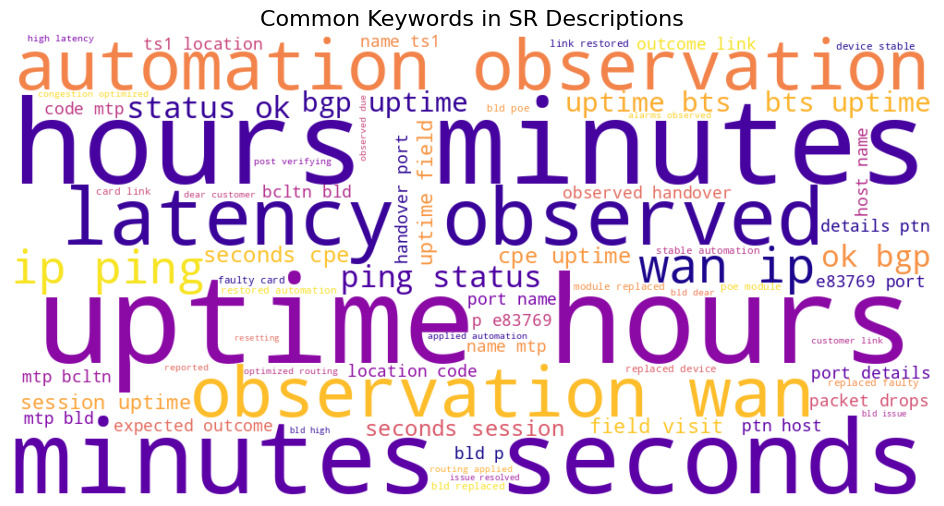

In [104]:
from wordcloud import WordCloud

text_data = " ".join(df['clean_text'].dropna().tolist())

wc = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text_data)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in SR Descriptions', fontsize=16)
plt.show()


# Find Repeat Patterns

In [105]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['clean_text'].tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [138]:
# KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(embeddings)

# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3, metric='cosine')
df['dbscan_cluster'] = dbscan.fit_predict(embeddings)

In [140]:
df['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
2,12
1,12
0,9
3,9
4,8


In [139]:
df['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,50


In [106]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
df['cluster'] = clusterer.fit_predict(embeddings)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Reason for HDBSCAN
I used HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) to automatically detect clusters (groups)
of similar service requests based on their text embeddings

We dont need to give the number of clusters(K) prior also rare items will be marked as '-1' which means we dont need to FORce it to fit in any cluster



In [107]:
df['cluster'].value_counts()

,count
cluster,
0,12
1,9
3,9
2,8
5,6
4,6


In [114]:
for cluster_id in df['cluster'].unique():
    if cluster_id == -1:
        continue
    cluster_texts = df[df['cluster']==cluster_id]['clean_text']
    print("cluster_texts: \n", cluster_texts)
    print(f"\nCluster {cluster_id} —-> {len(cluster_texts)} SRs", "\n")
    # print(cluster_texts.head(3).to_list())
    print("---Next--- \n")


cluster_texts: 
 0     high latency observed due to congestion optimi...
16    high latency observed due to congestion optimi...
18    high latency observed due to congestion optimi...
29    high latency observed due to congestion optimi...
32    high latency observed due to congestion optimi...
38    high latency observed due to congestion optimi...
39    high latency observed due to congestion optimi...
42    high latency observed due to congestion optimi...
49    high latency observed due to congestion optimi...
Name: clean_text, dtype: object

Cluster 1 —-> 9 SRs 

---Next--- 

cluster_texts: 
 1     poe module replaced device stable automation o...
2     poe module replaced device stable automation o...
4     poe module replaced device stable automation o...
6     poe module replaced device stable automation o...
10    poe module replaced device stable automation o...
12    poe module replaced device stable automation o...
21    poe module replaced device stable automation o...
22

# Observation:

there were 6 different types of recurrence patterns found from Hdbscan algorithm

In [143]:
from sklearn.metrics import silhouette_score
score = silhouette_score(embeddings, df['cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.992


# Observation:
evaluate cluster quality on seperation which gives good seperation

In [115]:
repeat_summary = df.groupby(['cluster', 'PRODUCT', 'CUSTOMER_NAME', 'PLATFORM']).size().reset_index(name='count')
repeat_summary.sort_values('count', ascending=False).head(10)


,cluster,PRODUCT,CUSTOMER_NAME,PLATFORM,count
4,0,Internet Leased Line,FDHCBANK,Fiber GPON,2
29,3,Broadband,THE SOUTH INDIAN BANK LIMITED,Fiber GPON,2
37,4,MPLS,FDHCBANK,Ethernet,2
44,5,MPLS,SISINFO LTD,RF P2MP,2
13,1,Internet Leased Line,BCCI BANK,RF P2MP,2
5,0,Internet Leased Line,TCC LTD,Ethernet,1
6,0,MPLS,BCCI BANK,Fiber GPON,1
7,0,MPLS,FDHCBANK,Ethernet,1
8,0,MPLS,THE SOUTH INDIAN BANK LIMITED,Ethernet,1
0,0,Broadband,FDHCBANK,Ethernet,1


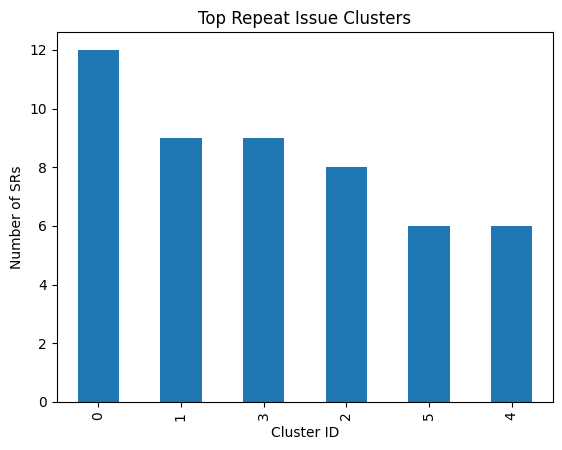

In [116]:
top_clusters = df['cluster'].value_counts().head(10)
top_clusters.plot(kind='bar')
plt.title('Top Repeat Issue Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Number of SRs')
plt.show()


# Observation:
Most number of SRs are related to the cluster 0 -"poe module replaced device stable automation"

# Customer wise Repeated issues

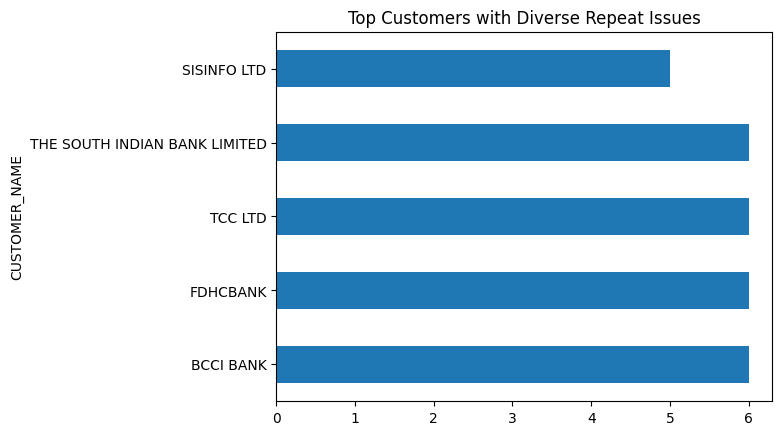

In [117]:
df.groupby('CUSTOMER_NAME')['cluster'].nunique().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top Customers with Diverse Repeat Issues')
plt.show()

# Product wise Repeated issues

<Axes: title={'center': 'Top Products by SR Volume'}, ylabel='PRODUCT'>

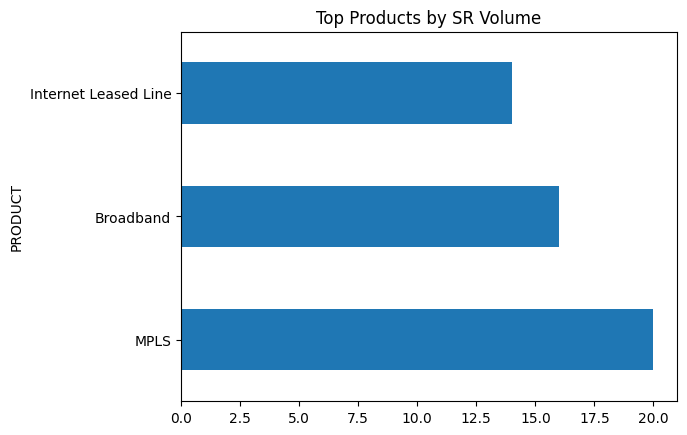

In [122]:
df['PRODUCT'].value_counts(normalize=False).plot(kind='barh', title='Top Products by SR Volume')


In [124]:
df.columns

Index(['CLOSEDATE', 'RESOLVEDTIME', 'PLATFORM', 'PRODUCT', 'SRNUMBER',
       'SINUMBER', 'SRCREATIONTIME', 'SRSTATUS', 'SRSUMMARY', 'SUBSUBTYPE',
       'X_RESOLUTION_COMMENT', 'CUSTOMER_NAME', 'CUSTOMER_SEGMENT',
       'HANDOVER_MUX_AND_PORT_DETAILS', 'AUTOMATION_RCA_CONCLUSION_TEXT',
       'Duration_hours', 'combined_text', 'clean_text', 'cluster', 'Month'],
      dtype='object')

<Axes: title={'center': 'Top 10 Repeat SR Owners'}, xlabel='CUSTOMER_NAME'>

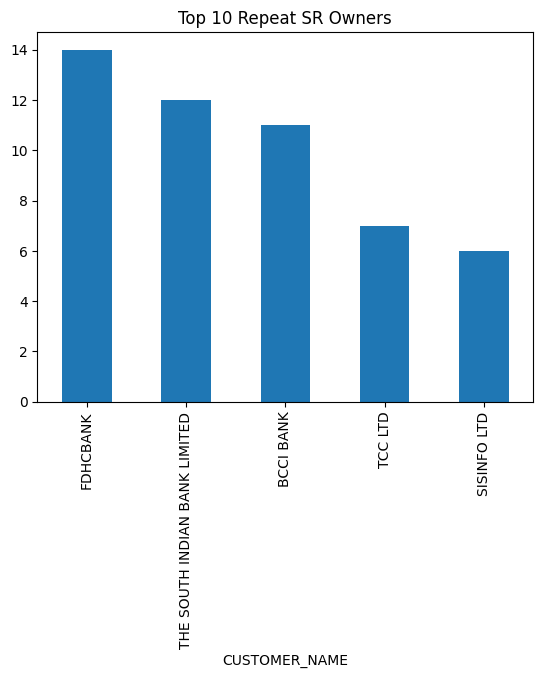

In [125]:
repeat_customers = df['CUSTOMER_NAME'].value_counts().head(10)
repeat_customers.plot(kind='bar', title='Top 10 Repeat SR Owners')


# Observation:
Need to focus on the Customer with higher SRs for top3 which is more than 10 SRs reported

In [128]:
df.iloc[0]

,0
CLOSEDATE,2025-06-27 19:00:00
RESOLVEDTIME,2025-06-27 20:00:00
PLATFORM,Fiber GPON
PRODUCT,Internet Leased Line
SRNUMBER,38094247
SINUMBER,10506597
SRCREATIONTIME,2025-06-27 10:00:00
SRSTATUS,In Progress
SRSUMMARY,NaN
SUBSUBTYPE,Link Failure


# Average time taken to resolve by Subtypes

<Axes: title={'center': 'Avg Resolution Time by Subtype'}, ylabel='SUBSUBTYPE'>

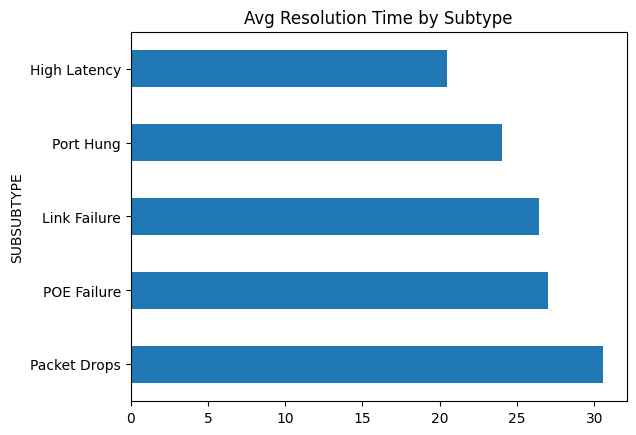

In [129]:
df['RESOLVEDTIME'] = pd.to_datetime(df['RESOLVEDTIME'])
df['SRCREATIONTIME'] = pd.to_datetime(df['SRCREATIONTIME'])
df['Resolution_Hours'] = (df['RESOLVEDTIME'] - df['SRCREATIONTIME']).dt.total_seconds() / 3600

avg_res_time = df.groupby('SUBSUBTYPE')['Resolution_Hours'].mean().sort_values(ascending=False)
avg_res_time.head(10).plot(kind='barh', title='Avg Resolution Time by Subtype')


# Observation:
Avg Resolution Time by Subtype were

--> more than 30 hours for 'packetdrops'

--> bit faster to complete is 'High Latency' SRs

# calculate SR breachRates by Product, PLatform

<Axes: title={'center': 'SLA Breach Rate by Product'}, ylabel='PRODUCT'>

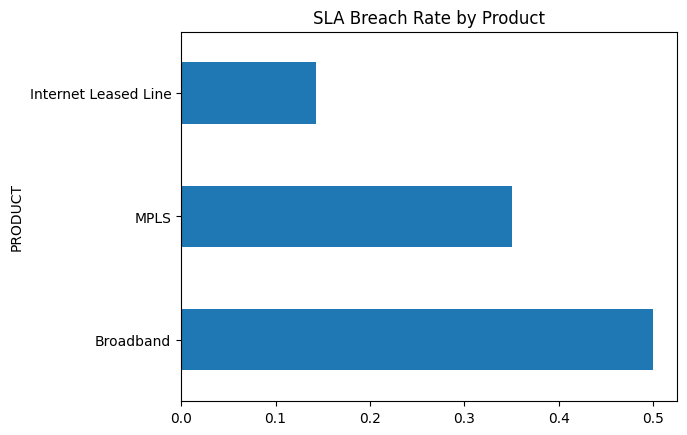

In [134]:
sla_limit = 36 # hours
df['SLA_Breached'] = df['Resolution_Hours'] > sla_limit
sla_summary = df.groupby('PRODUCT')['SLA_Breached'].mean().sort_values(ascending=False)
sla_summary.plot(kind='barh', title='SLA Breach Rate by Product')


# Observation:
BY Product:

more than 45% SLA breaches are happening for Broadband related issues

nearly 15% for Internet Leased lines followed by 35% for MPLS

<Axes: title={'center': 'SLA Breach Rate by Platform'}, ylabel='PLATFORM'>

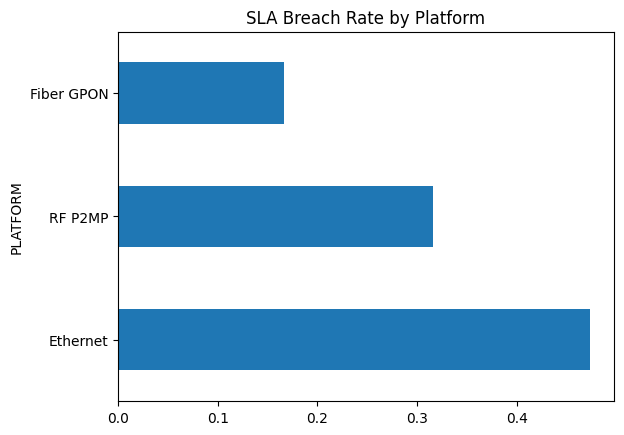

In [146]:
sla_limit = 36 # hours
df['SLA_Breached'] = df['Resolution_Hours'] > sla_limit
sla_summary = df.groupby('PLATFORM')['SLA_Breached'].mean().sort_values(ascending=False)
sla_summary.plot(kind='barh', title='SLA Breach Rate by Platform')


# Observation:
BY Platform:

more than 45% SLA breaches are happening for Ethernet related

nearly 15% for Fiber GPON

<Axes: title={'center': 'SLA Breach Rate by CustomerName'}, ylabel='CUSTOMER_NAME'>

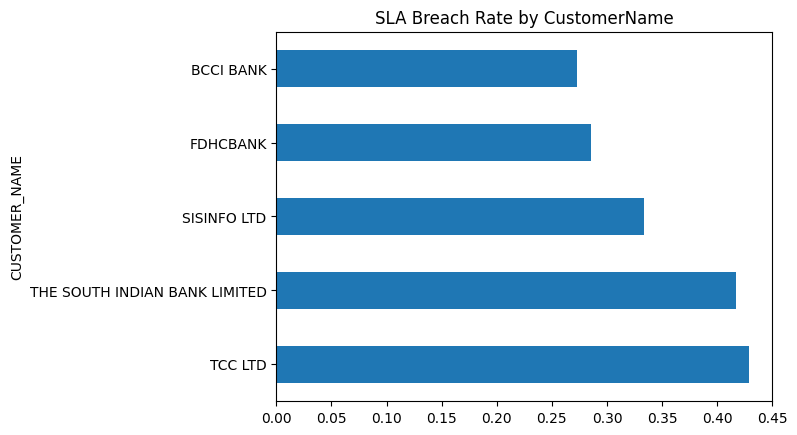

In [145]:
sla_limit = 36 # hours
df['SLA_Breached'] = df['Resolution_Hours'] > sla_limit
sla_summary = df.groupby('CUSTOMER_NAME')['SLA_Breached'].mean().sort_values(ascending=False)
sla_summary.plot(kind='barh', title='SLA Breach Rate by CustomerName')


# Observation:
BY Customer:

Nearly 40 to 45% SLA breaches are happening for the TCC and SIB customer.

least for now by ~27% for BCCI bank